<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/ch00_05_OpenCV%ED%99%9C%EC%9A%A9_%EC%B0%A8%EC%84%A0%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch00.05. OpenCV 활용 - 차선인식
---
* 날짜:
* 이름:

## 학습내용
    - 허프 변환을 이용한 차선 인식
    - 이미지에서 차선 인식하기
    - 동영상에서 차선 인식하기

## 학습자료


- [OpenCV 홈페이지](https://opencv.org/)

- [OpenCV-python Documentation](https://opencv-python.readthedocs.io/en/latest/)


## 개념정리
---

카메라에서 도로의 차선을 감지하는 것으로 차량 혹은 로봇의 자율주행 기술에 자주 사용됩니다.

<p align='center'>
<img src=https://miro.medium.com/max/1400/1*nX0QqMYYWA4pT3yppzFzgw.jpeg width=500>
</p>


## 허프 변환을 이용한 차선감지
---



#### **세팅**


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

540 960 3


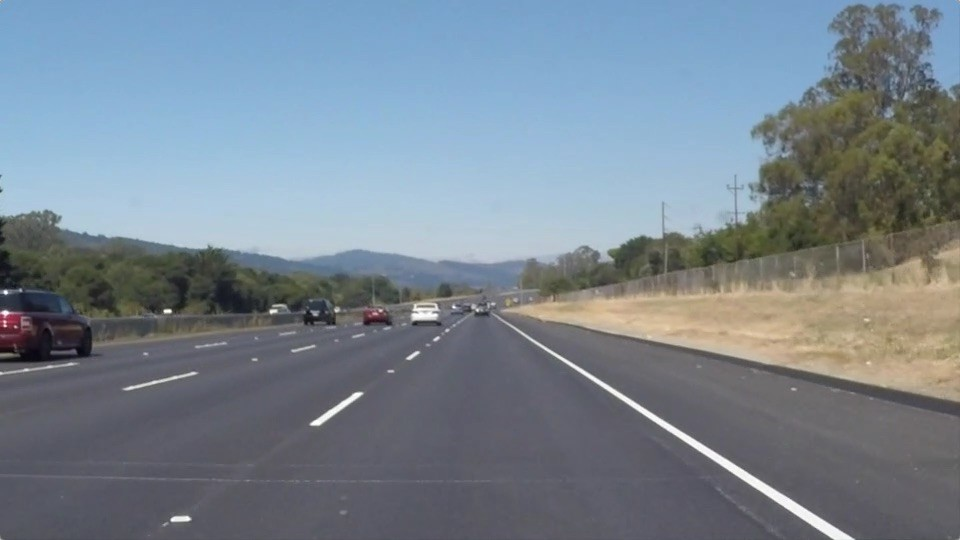

In [ ]:
f_path = 'load.png'
img = cv2.imread(f_path)
h, w, c = img.shape
print(h,w,c)
cv2_imshow(img)

### **| 전처리**

In [ ]:
# Gray scale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
cv2_imshow(gray_img)

In [ ]:
# GaussianBlur (노이즈 감소)
blur_img = cv2.GaussianBlur(gray_img, (5,5), 0)
cv2_imshow(blur_img)

In [ ]:
# Canny
canny_img = cv2.Canny(blur_img, 40, 130)
cv2_imshow(canny_img)

### **| 차선 인식**

#### **Region of interest**

In [ ]:
# 검정색 배경 (value=0)
bkg = np.zeros((h, w), dtype='uint8') # 정수가 아니면 opencv 오류
cv2_imshow(bkg)

In [ ]:
#mask = cv2.circle(bkg, (int(w/2), int(h/2)), 150, (255,255,255), -1)
#cv2_imshow(mask)
p_left = int(0.47*w)
p_right = int(0.53*w)
p_height = int(0.6*h)
pts = np.array([ (0,h), (p_left, p_height ), (p_right, p_height), (w, h) ])
mask = cv2.fillPoly(bkg, [pts], (255))
print(mask.shape)
cv2_imshow(mask)

In [ ]:
masked = cv2.bitwise_and(canny_img, mask)
cv2_imshow(masked)

#### **허프 변환**

In [ ]:
lines = cv2.HoughLinesP(masked, 1, np.pi / 180, 20)
#print(lines)

In [ ]:
for line in lines:
  #print(line, line.reshape(4))  
  x1, y1, x2, y2 = line.reshape(4) #(x1,y1):시작좌표 (x2,y2):끝나는좌표
  cv2.line(img, (x1,y1), (x2, y2), (0,0,255), 2)
cv2_imshow(img)

### **| 함수 작성**

In [ ]:
def lane_detector(frame):
  lPython.display.clear_output(wait=True)
  h, w, c = frame.shape
  # gray
  gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # blur
  blur_img = cv2.GaussianBlur(gray_img, (5,5), 0)
  # canny
  canny_img = cv2.Canny(blur_img, 40, 130)
  # roi
  bkg = np.zeros((h, w), dtype='uint8') # 정수가 아니면 opencv 오류
  p_left = int(0.4*w)
  p_right = int(0.6*w)
  p_height = int(0.6*h)
  pts = np.array([ (0,h), (p_left, p_height ), (p_right, p_height), (w, h) ])
  mask = cv2.fillPoly(bkg, [pts], (255))
  masked = cv2.bitwise_and(canny_img, mask)
  # houghline
  lines = cv2.HoughLinesP(masked, 1, np.pi / 180, 20)
  for line in lines:
    #print(line, line.reshape(4))  
    x1, y1, x2, y2 = line.reshape(4) #(x1,y1):시작좌표 (x2,y2):끝나는좌표
    cv2.line(frame, (x1,y1), (x2, y2), (0,0,255), 2)
  # show
  cv2_imshow(frame)

#### **이미지 적용**

In [ ]:
f_path = 'load.png'
frame = cv2.imread(f_path)
lane_detector(frame)

#### **영상 적용**

## 과제
---



### **과제 01**
[Image Smoothing](https://opencv-python.readthedocs.io/en/latest/doc/11.imageSmoothing/imageSmoothing.html)

[Image Gradients](https://opencv-python.readthedocs.io/en/latest/doc/13.imageGradient/imageGradient.html)

[허프 변환](https://opencv-python.readthedocs.io/en/latest/doc/25.imageHoughLineTransform/imageHoughLineTransform.html)

